In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import operator

In [2]:
import_file = 'dataset/review.json'
review = pd.read_json(import_file, lines=True)

In [3]:
import_file = 'dataset/user.json'
user = pd.read_json(import_file, lines=True)

In [7]:
user

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.80,5174,284,5174,5175,78,299,1435,7829,7397,...,16856,"[2014, 2016, 2013, 2011, 2012, 2015, 2010, 2017]",209,"[M19NwFwAXKRZzt8koF11hQ, QRcMZ8pJJBBZaKubHOoMD...",16605,Cin,272,17019,lsSiIjAKVl-QRxKjRErBeg,2010-07-13
1,3.94,1556,211,1556,1285,101,134,1295,162,2134,...,40110,"[2014, 2017, 2011, 2012, 2015, 2009, 2013, 200...",835,"[eoSSJzdprj3jxXyi94vDXg, QF0urZa-0bxga17ZeY-9l...",10882,Andrea,2559,83681,om5ZiponkpRqUNa3pVPiRg,2006-01-18
2,4.72,15,1,15,5,0,1,11,8,20,...,55,[],17,"[Oa84FFGBw1axX8O6uDkmqg, SRcWERSl4rhm-Bz9zN_J8...",4,Gabe,277,45,-lGwMGHMC_XihFJNKCJNRg,2014-10-31
3,3.76,9,0,9,1,0,1,4,1,11,...,4,"[2016, 2017]",11,"[96DJovjKAtExnyBZRfniPQ, Djczq-bRn761U4FW77NUt...",4,Leah,436,15,D-ydMTPGWXTVm4_jjp0k9g,2013-04-01
4,4.23,276,0,276,59,0,8,51,169,386,...,6006,"[2017, 2016]",49,"[iN0A6QIrEFYoSGHFaknh8Q, B2HDoWNIzLlon0IhS1cmD...",360,Juan,921,9152,PcvbBOCOcs6_suRDH7TSTg,2012-08-16
5,5.00,0,0,0,0,0,0,0,0,0,...,1,[],1,"[HanGVaZP_0IwhQdc0F5paQ, _v1_G2Fs56K8JTAzzItAM...",2,Charmaine,22,1,uXjR2GhCAYhqxVr21aC4vQ,2011-10-14
6,4.40,9,0,9,8,0,2,1,1,4,...,0,"[2017, 2016]",17,"[ZWD8UH1T7QXQr0Eq-mcWYg, ObSXluQeEYiOP9l9muFlG...",0,Victoria,91,0,N2arP_u4sMGLgOZhA6ZFoQ,2013-12-20
7,4.06,4,0,4,5,0,5,4,5,5,...,1,"[2016, 2015]",5,"[Puvuej6lzJ1JOEmtjG7V_Q, fq7CL1myWPYeH0d4bKtsI...",3,Erica,68,5,YHJIMK_zVH_VY6HCY6bYvg,2012-06-08
8,3.63,4,0,4,1,0,3,1,0,2,...,2,[],3,"[b8NTnxrhHCs6IPAKrzYL9w, vaNvEgtznFwSPDNkbM7hj...",11,Whitney,184,141,g3V76Ja0XgWS1rqx0gxL_A,2007-09-11
9,4.19,1,0,1,0,0,0,2,0,1,...,2,[],5,"[lM_HnyWHrpBsrgts3VnkxA, ynYGa-R1ZJf-tJOVlQeML...",6,Paul,48,0,VTL4Dep5p7XrrOtgnXdEIQ,2010-04-25


In [4]:
import_file = 'dataset/business.json'
business = pd.read_json(import_file, lines=True)

In [5]:
businessReviews = pd.merge(review, business, on='business_id', right_index=True)[['user_id','business_id','review_id','latitude','longitude','stars_x','stars_y']]

In [13]:
userReviews = pd.merge(businessReviews, user, on='user_id', right_index=True)[['user_id','business_id','review_id','latitude','longitude','stars_x','stars_y', 'review_count']]

In [9]:
businessReviews

,user_id,business_id,review_id,latitude,longitude,stars_x,stars_y
0,cjpdDjZyprfyDG3RlkVG3w,uYHaNptLzDLoV_JZ_MuzUA,VfBHSwC5Vz_pbFluy07i9Q,55.950875,-3.191463,5,4.0
1,bjTcT8Ty4cJZhEOEo01FGA,uYHaNptLzDLoV_JZ_MuzUA,3zRpneRKDsOPq92tq7ybAA,55.950875,-3.191463,3,4.0
2,AXgRULmWcME7J6Ix3I--ww,uYHaNptLzDLoV_JZ_MuzUA,ne5WhI1jUFOcRn-b-gAzHA,55.950875,-3.191463,3,4.0
3,oU2SSOmsp_A8JYI7Z2JJ5w,uYHaNptLzDLoV_JZ_MuzUA,llmdwOgDReucVoWEry61Lw,55.950875,-3.191463,4,4.0
4,0xtbPEna2Kei11vsU-U2Mw,uYHaNptLzDLoV_JZ_MuzUA,DuffS87NaSMDmIfluvT83g,55.950875,-3.191463,5,4.0
5,rW8q706dz5-NnXDzMwVkiw,uYHaNptLzDLoV_JZ_MuzUA,GvLmUkjUrOyFH8KFnmT1uw,55.950875,-3.191463,5,4.0
6,yx8vNXUL0D0HS8rUIC7AFA,uYHaNptLzDLoV_JZ_MuzUA,lGEl24NGj2HVBJrodeXcjg,55.950875,-3.191463,4,4.0
7,zXnH6W74FAJQ7q7b-NuBsA,uYHaNptLzDLoV_JZ_MuzUA,cUgvEy5wj7zYE68v1BzzVg,55.950875,-3.191463,4,4.0
8,c5yp5hxwC1N98MjbV2LyWQ,uYHaNptLzDLoV_JZ_MuzUA,FSB_BnvysBgH3JYrbFNcgw,55.950875,-3.191463,4,4.0
9,xJisL5w4wOgiYLokGMT_IA,uYHaNptLzDLoV_JZ_MuzUA,dhl3ZW9aAEX_T7_um5tfaQ,55.950875,-3.191463,4,4.0


In [10]:
userReviews

,user_id,business_id,review_id,latitude,longitude,stars_x,stars_y,review_count
0,cjpdDjZyprfyDG3RlkVG3w,uYHaNptLzDLoV_JZ_MuzUA,VfBHSwC5Vz_pbFluy07i9Q,55.950875,-3.191463,5,4.0,4
66617,cjpdDjZyprfyDG3RlkVG3w,Nvi9RLcOdrJvSwcw-ziZQQ,gieaGL6UEtNGMJRpOPUHjg,55.945860,-3.206205,5,3.5,4
1,bjTcT8Ty4cJZhEOEo01FGA,uYHaNptLzDLoV_JZ_MuzUA,3zRpneRKDsOPq92tq7ybAA,55.950875,-3.191463,3,4.0,169
277415,bjTcT8Ty4cJZhEOEo01FGA,D2smJ2r0RrVoe0aGlT-2wA,BVwTKOMnEevDQI8n_CHjGg,55.952860,-3.198621,5,3.5,169
988950,bjTcT8Ty4cJZhEOEo01FGA,6Kl2SQp-zGo-nsdImLykxw,X3dAS9SjWLi25zexhZtOQA,55.949990,-3.188796,5,4.0,169
1621720,bjTcT8Ty4cJZhEOEo01FGA,WbddSfX26mRGXpyuy2ClYQ,mpajk91608DKrZdvHLt7KA,45.501846,-73.558826,5,4.0,169
1935212,bjTcT8Ty4cJZhEOEo01FGA,sQS0mRR_N-K3lzV8v3DFcw,4xts4YYUJNAE40rocQc_jA,55.948890,-3.186663,5,4.0,169
2537190,bjTcT8Ty4cJZhEOEo01FGA,um_o0pxQ3DlRI9EfCzw0hw,Ockks8bbodc8GySKStpF2Q,45.511072,-73.565886,5,4.5,169
2513830,bjTcT8Ty4cJZhEOEo01FGA,Eho3fnzWStx4YgXkhbVNQQ,6-rJWGMHGyJLusWK0svZrw,55.950736,-3.190259,5,4.5,169
2969769,bjTcT8Ty4cJZhEOEo01FGA,xNpD5ObRmK0q87f6QU283A,z6O-NERFYyYB2SbkJgoanA,45.501225,-73.559362,5,3.5,169


In [14]:
with open('userReview.json', 'w') as f:
    f.write(userReviews.to_json(orient='records', lines=True))

In [11]:
tmp = businessReviews[['business_id','user_id','latitude','longitude']].query("user_id == 'cQU8IWVEJYcklBJbW9CzdQ'")[['user_id','business_id','latitude','longitude']]

NameError: name 'businessReviews' is not defined

In [19]:
tmp

,user_id,business_id,latitude,longitude
140695,cQU8IWVEJYcklBJbW9CzdQ,P7pxQFqr7yBKMMI2J51udw,36.109844,-115.174604
120888,cQU8IWVEJYcklBJbW9CzdQ,0XoTT540HMB_5q4Exj8yGA,36.090435,-115.174223
704698,cQU8IWVEJYcklBJbW9CzdQ,2weQS-RnoOBhb1KsHKyoSQ,36.126887,-115.165590
218229,cQU8IWVEJYcklBJbW9CzdQ,K7fip0nDFFdCC7OCnNOotQ,36.112917,-115.175079
159412,cQU8IWVEJYcklBJbW9CzdQ,PgJgpW4TKQ8IoALH2Yq-zA,36.091219,-115.175804
168436,cQU8IWVEJYcklBJbW9CzdQ,QkSf6Dgn4hYWNfaT6_kd5A,36.125283,-115.273581
271493,cQU8IWVEJYcklBJbW9CzdQ,5VXlHFrYZZzj7zfZEsz5nQ,36.105289,-115.174037
268106,cQU8IWVEJYcklBJbW9CzdQ,qsJkjQoM3Hdg6Gtqp2S9_w,36.147153,-115.299976
247342,cQU8IWVEJYcklBJbW9CzdQ,k1q9f7aJ2TsoSbeA8Qm1aA,36.114539,-115.195684
324386,cQU8IWVEJYcklBJbW9CzdQ,Rhc1qf9DGRw7t1DDjNfRUQ,36.106204,-115.173171


In [7]:
def review_clusters(user):
    user_reviews = businessReviews[['business_id','user_id','latitude','longitude']].query('user_id == user')[['user_id','business_id','latitude','longitude']]
    

In [25]:
loc = locations_by_user('c5yp5hxwC1N98MjbV2LyWQ')

In [26]:
businesses = loc[0]
latitudes = loc[1]
longitudes = loc[2]

In [27]:
import gmplot
gmap = gmplot.GoogleMapPlotter(36, -150, 16)
gmap.scatter(latitudes, longitudes, 'cornflowerblue', edge_width=10)
gmap.draw("mymap.html")

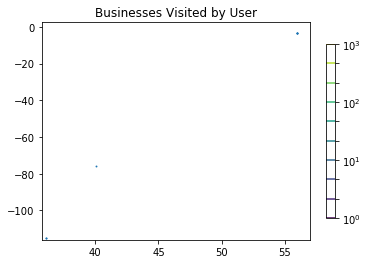

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

X_train = []
for i in range(len(latitudes)):
    X_train.append([latitudes[i],longitudes[i]])
X_train = np.array(X_train)

# fit a Gaussian Mixture Model with one component
clf = mixture.GaussianMixture(n_components=1, covariance_type='full')
clf.fit(X_train)
center = clf.means_[0]

# display predicted scores by the model as a contour plot
x = np.linspace(35.75, 36.5)
y = np.linspace(-112, -116)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Businesses Visited by User')
plt.axis('tight')
plt.show()

In [29]:
center = clf.means_[0]

In [10]:
import reverse_geocoder as rg

coordinates = (45.501846, -73.558826	)

results = rg.search(coordinates) # default mode = 2

print '%s, %s' % (results[0]['admin1'], results[0]['admin2'])

Quebec, Montreal
